
# CRISP-DM Methodology

In this section we overview our selected method for engineering our solution. CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It is an open standard guide that describes common approaches that are used by data mining experts. CRISP-DM includes descriptions of the typical phases of a project, including tasks details and provides an overview of the data mining lifecycle. The lifecycle model consists of six phases with arrows indicating the most important and frequent dependencies between phases. The sequence of the phases is not strict. In fact, most projects move back and forth between phases as necessary. It starts with business understanding, and then moves to data understanding, data preparation, modelling, evaluation, and deployment. The CRISP-DM model is flexible and can be customized easily.

# Buissness Understanding

    Tasks:
    1.Determine business objectives
    2.Assess situation
    3.Determine data mining goals
    4.Produce project plan

# Data Understanding

    Tasks
    1.Collect data
    2.Describe data
    3.Explore data    

# Data Preparation

    Tasks
    1.Data selection
    2.Data preprocessing
    3.Feature engineering
    4.Dimensionality reduction

    Steps:
    Data cleaning

    Data integration

    Data sampling

    Data dimensionality reduction

    Data formatting

    Data transformation

    Scaling

    Aggregation

    Decomposition

# Data Modeling :

Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

    Tasks
    1. Select modeling technique Select technique

    2. Generate test design

    3. Build model

    4. Assess model

# Data Evaluation :

    Tasks
    1.Evaluate Result

    2.Review Process

    3.Determine next steps

# Deployment :

    Tasks
    1.Produce Final presentation
    2.Produce Final report 
    3.Conduct Final review 


# 1-Data Understanding
    Tasks
    1.Collect data
    2.Describe data
    3.Explore data 
    
# Result 

This repository contains instructions and data for a test project for the
Intellisense.io Data Science team.

## Overview

The goal of the project is to devise and implement a prototype data-driven
prediction model of a Semi-autogenous (SAG) Mill.

## Background

Semi-autogenous (SAG) mills are central pieces of equipment for large mining
operations. They are commonly used in the secondary crushing stage to break
down larger rocks from the pit for further processing. As a very rough analogy,
a SAG mill works like a giant washing machine for rocks and steel balls. For
a quick introduction to the working principle, we have compiled some videos in
[this playlist](https://www.youtube.com/playlist?list=PLChAfAeM2Zma_5SHfw5jrT0KQAY2z0ne8).

This project involves the optimization of a SAG mill using real-time data from
their distributed control system. The broader target for model development
here, in a nutshell, is to maximize material throughput while minimizing power
draw. In this project, you will be tackling a first requirement for this
optimizer: a prediction model. Since detailed physical simulations as shown
in the videos linked are computationally too expensive and many of the inputs
are unknown, we are looking for alternative methods to make predictions, based
on the recorded data.

## Environment

The immediate environment of the SAG mill is shown below. A set of six feeders
(small conveyors) transfer the material onto the main conveyor belt. Water
dilution is added when the material is fed into the SAG mill, and steel balls
are added periodically as additional grinding medium. Inside the mill, the
material breaks down due to impacts and grinding. The material is screened by
size using metal grates, and material that is small enough can exit the mill to
the right. After the mill, the material is separated by size: The larger
particles (pebbles) are fed into the pebble crusher as additional grinding
stage (not shown in the figure), and the smaller particles are fed to cyclone
that separates them further into fine product for flotation and coarse product
for additional grinding.

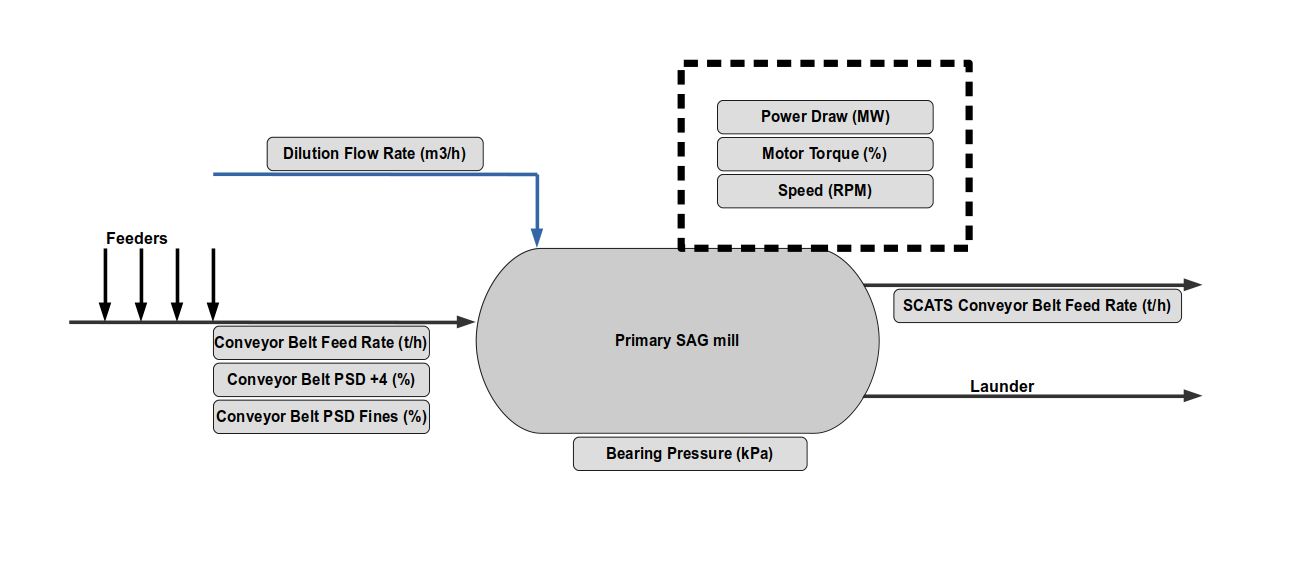

## Activities to be performed

-   Become familiar with the basic working principle of a SAG mill
-   Become familiar with the provided data
-   Select a model to predict performance variables 5 minutes in advance
-   Implement a prototype of this model to generate results
-   Use the test data to calculate prediction error statistics and compare them to the baseline provided in `baseline.ipynb`
-   Present your model and results to the team

## Project Output

-   Short summary of the approach, decisions, and steps taken
-   Predictor prototype code
-   Error statistics and result visualization

## Data overview

IntelliSense.io provides roughly four months of data based on real measurements
from a client SAG mill. Types of data tracked include performance variables,
which are used to monitor the operation of the mill (and can be considered
outputs); feed variables, which are outside of the control of the operator; and
control variables, which can be controlled by the operator. The following data
is available:

-   Performance variables
    -   Power Draw (MW) — Power drawn by the mill motor
    -   Bearing Pressure (kPa) — Pressure on the mill supports. Can be
        thought of as the weight of the mill.
-   Control variables
    -   Speed (RPM) — Rotation speed of the mill
    -   Conveyor Belt Feed Rate (t/h) — Mass flow rate of material into the
        mill
    -   Dilution Flow Rate (m³/h) — Volume flow rate of water into the mill
-   Feed variables
    -   Conveyor Belt Fines (%) — Percent of material in the feed
        classified as "fine"


## Hints

- Depending on your modelling method, you may want to apply some preprocessing to the data (make sure that time consistency is preserved if you choose to remove full rows of data)
- Use the data from all the variables as your model inputs
- Try using the last 5 to 20 minutes of data as model inputs
- The targets for the predictions are the two performance variables at 5 minutes into the future
- See plot below for an example prediction setup using 20 minutes of history inputs (blue) and predicting the two marked points (green)

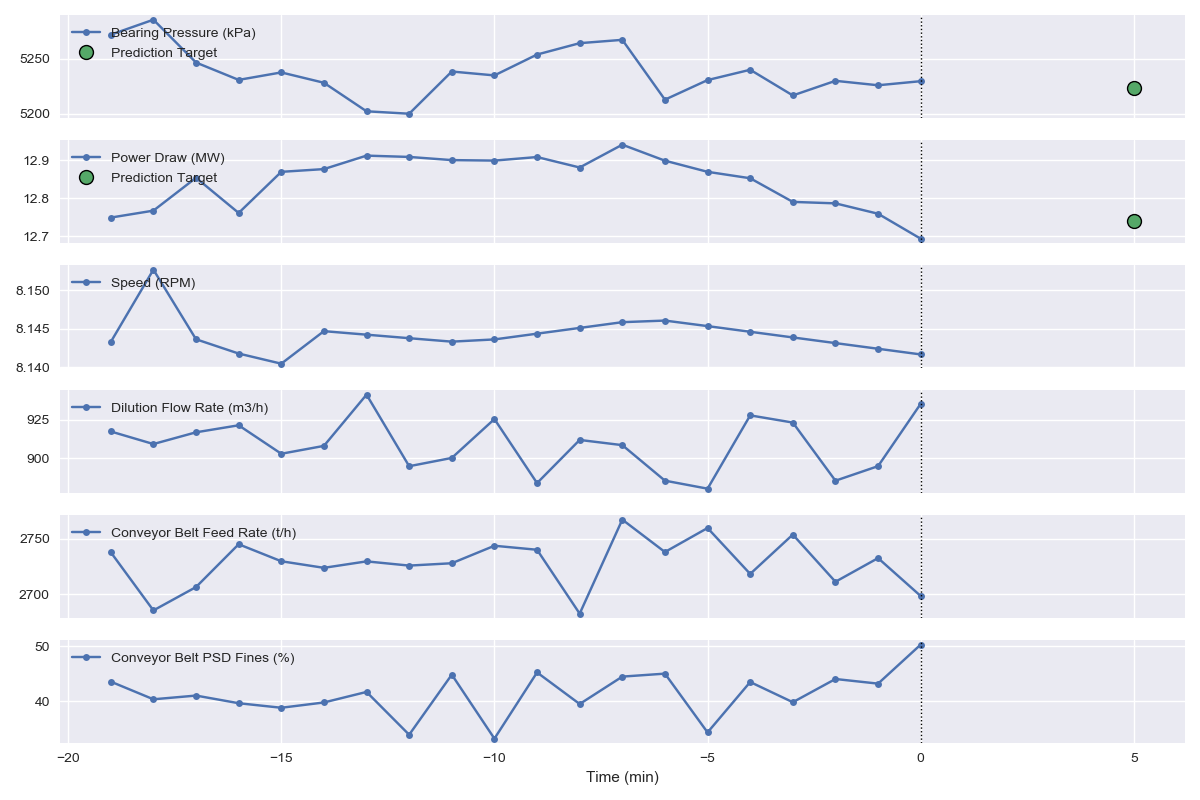



    
    
    
    

# Inspecting your data
## Load Data

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, date 
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
# Import Normalizer
from sklearn.preprocessing import Normalizer
import os
import plotly_express as px# Visualization
import plotly.graph_objects as go# Visualization
from plotly.subplots import make_subplots# Visualization
import gc
import warnings # Supress warnings 
warnings.filterwarnings('ignore')

In [4]:
TrainData= '/home/abderrazak/ALLINHERE/NLP/Datacamp/sag_data_train.csv'
TestData= '/home/abderrazak/ALLINHERE/NLP/Datacamp/sag_data_test.csv'
#df = pd.read_csv(TrainData)
df = pd.read_csv(TrainData, parse_dates=['Time'])
#df = pd.read_csv(TrainData, index_col='Time', parse_dates=True)
df['Date'] = pd.to_datetime(df.Time, format = '%d/%m/%Y')

In [9]:
df.columns

Index(['Time', 'Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)', 'Date'],
      dtype='object')

# Downcasting

In this section I'll be downcasting the dataframes to reduce the amount of storage used by them and also to expidite the operations performed on them.

In [10]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [27]:
df=reduce_mem_usage(df)

Memory usage of dataframe is 8.44 MB
Memory usage after optimization is: 8.44 MB
Decreased by 0.0%


In [28]:
df.shape

(138241, 8)

In [29]:
df_cleaned=df.drop_duplicates().dropna()
df_cleaned.shape

(138238, 8)

In [15]:
df_cleaned.head(2)

,Time,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%),Date
0,2015-09-15 00:00:00,5488.175540,11.737357,7.843532,1030.590108,2935.660276,38.641018,2015-09-15 00:00:00
1,2015-09-15 00:01:00,5423.930126,11.543755,7.681607,1039.869847,2928.333772,45.243656,2015-09-15 00:01:00


In [31]:
df.columns

Index(['Time', 'Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)'],
      dtype='object')

In [16]:
df.tail(2)

,Time,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%),Date
138239,2015-12-19 23:59:00,5244.054889,13.103755,8.239607,951.282578,2882.385391,47.955658,2015-12-19 23:59:00
138240,2015-12-20 00:00:00,5281.921060,13.024095,8.154889,971.209886,2861.211279,47.923199,2015-12-20 00:00:00


# DataFrame data types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138241 entries, 0 to 138240
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Time                           138241 non-null  datetime64[ns]
 1   Bearing Pressure (kPa)         138240 non-null  float64       
 2   Power Draw (MW)                138240 non-null  float64       
 3   Speed (RPM)                    138241 non-null  float64       
 4   Dilution Flow Rate (m3/h)      138239 non-null  float64       
 5   Conveyor Belt Feed Rate (t/h)  138239 non-null  float64       
 6   Conveyor Belt PSD Fines (%)    138239 non-null  float64       
 7   Date                           138241 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6)
memory usage: 8.4 MB


In [18]:
df.dtypes

Time                             datetime64[ns]
Bearing Pressure (kPa)                  float64
Power Draw (MW)                         float64
Speed (RPM)                             float64
Dilution Flow Rate (m3/h)               float64
Conveyor Belt Feed Rate (t/h)           float64
Conveyor Belt PSD Fines (%)             float64
Date                             datetime64[ns]
dtype: object

# Null Values:

In [19]:
print("***Count all NaN in a DataFrame (both columns & Rows)***")
print("Total NaN in Dataframe" , df.isnull().sum().sum(), sep='\n')
print("***Count NaN in each column of a DataFrame***")
print("Nan in each columns" ,df.isnull().sum(), sep='\n')

***Count all NaN in a DataFrame (both columns & Rows)***
Total NaN in Dataframe
8
***Count NaN in each column of a DataFrame***
Nan in each columns
Time                             0
Bearing Pressure (kPa)           1
Power Draw (MW)                  1
Speed (RPM)                      0
Dilution Flow Rate (m3/h)        2
Conveyor Belt Feed Rate (t/h)    2
Conveyor Belt PSD Fines (%)      2
Date                             0
dtype: int64


# Statistical exploratory data analysis
The median is a very useful statistic, especially in the presence of outliers, when it is more robust than the mean.
## Median vs mean

In many data sets, there can be large differences in the mean and median value due to the presence of outliers. 


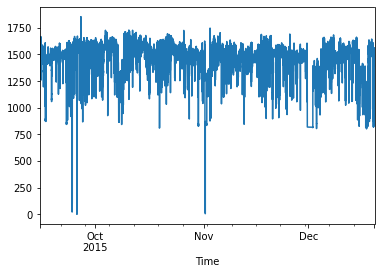

In [20]:


# Construct the mean percentage per year: mean
mean = df.mean(axis='columns')
mean.plot(subplots=True)
plt.show()

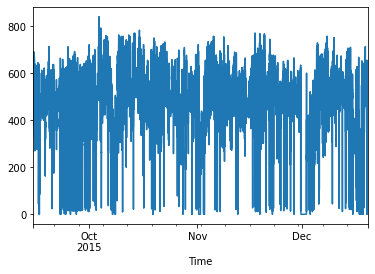

In [21]:

# Construct the mean percentage per year: mean
mean = df.median(axis='columns')
mean.plot(subplots=True)
plt.show()

In [22]:
df.corr()

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Bearing Pressure (kPa),1.000000,0.518896,0.484076,0.436871,0.344822,0.308349
Power Draw (MW),0.518896,1.000000,0.980499,0.760329,0.668028,0.623430
Speed (RPM),0.484076,0.980499,1.000000,0.766704,0.720555,0.696170
Dilution Flow Rate (m3/h),0.436871,0.760329,0.766704,1.000000,0.845888,0.626104
Conveyor Belt Feed Rate (t/h),0.344822,0.668028,0.720555,0.845888,1.000000,0.736723
Conveyor Belt PSD Fines (%),0.308349,0.623430,0.696170,0.626104,0.736723,1.000000


In [23]:
df.describe()

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
count,138240.000000,138240.000000,138241.000000,138239.000000,138239.000000,138239.000000
mean,5361.525046,12.648002,8.010549,914.572160,2397.461043,39.530702
std,202.317899,2.680285,1.617348,253.075068,667.784116,9.964700
min,35.651295,-0.073347,0.000000,0.000000,0.000000,0.000000
25%,5288.404458,12.442005,8.057497,844.109738,2214.865825,36.440241
50%,5363.159059,13.228316,8.421999,954.845114,2595.094886,41.042423
75%,5450.906468,13.943626,8.677781,1052.036362,2816.975578,44.861298
max,5995.657529,14.965945,8.730035,1636.474899,3594.124010,84.740463


## Quantiles

In [24]:
print(df.count())
# Print the 5th and 95th percentiles
print(df.quantile([0.05,0.95]))

Bearing Pressure (kPa)           138240
Power Draw (MW)                  138240
Speed (RPM)                      138241
Dilution Flow Rate (m3/h)        138239
Conveyor Belt Feed Rate (t/h)    138239
Conveyor Belt PSD Fines (%)      138239
dtype: int64
      Bearing Pressure (kPa)  Power Draw (MW)  Speed (RPM)  \
0.05             5176.749557         9.871736     6.654066   
0.95             5568.242647        14.457813     8.712369   

      Dilution Flow Rate (m3/h)  Conveyor Belt Feed Rate (t/h)  \
0.05                 456.580585                    1044.078274   
0.95                1231.595850                    3040.950941   

      Conveyor Belt PSD Fines (%)  
0.05                    26.514928  
0.95                    50.897267  


# Visual exploratory data analysis
## pandas line plots

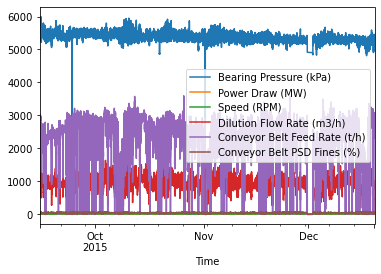

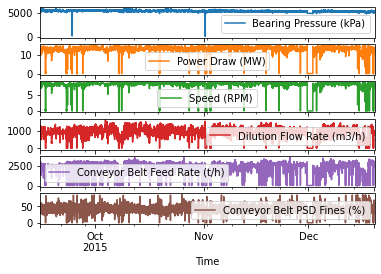

In [25]:
# Plot all columns (default)
df.plot()
plt.show()

# Plot all columns as subplots
df.plot(subplots=True)
plt.show()



##  Show sample of column 

In [26]:
df.columns.values

array(['Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)'], dtype=object)

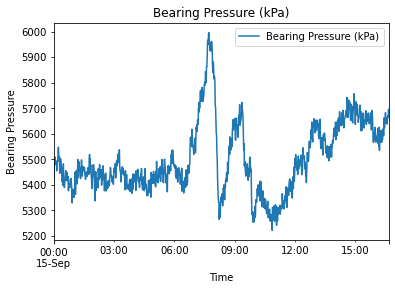

In [36]:
# Create a list of y-axis column names: y_columns
y_columns = ['Bearing Pressure (kPa)']
df1=df.iloc[0:1000]
# Generate a line plot
df1.plot(x='Time', y=y_columns)

# Add the title
plt.title('Bearing Pressure (kPa)')

# Add the y-axis label
plt.ylabel('Bearing Pressure')

# Display the plot
plt.show()

## pandas scatter plots

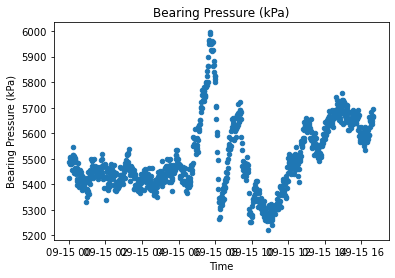

In [37]:
# Generate a scatter plot
df1.plot(kind='scatter', x='Time', y='Bearing Pressure (kPa)')

# Add the title
plt.title('Bearing Pressure (kPa)')

# Add the x-axis label
plt.xlabel('Time')

# Add the y-axis label
plt.ylabel('Bearing Pressure (kPa)')

# Display the plot
plt.show()

In [30]:
df_cleaned.columns

Index(['Time', 'Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)', 'Date'],
      dtype='object')

In [31]:
df_cleaned.tail(1)

,Time,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%),Date
138240,2015-12-20,5281.92106,13.024095,8.154889,971.209886,2861.211279,47.923199,2015-12-20


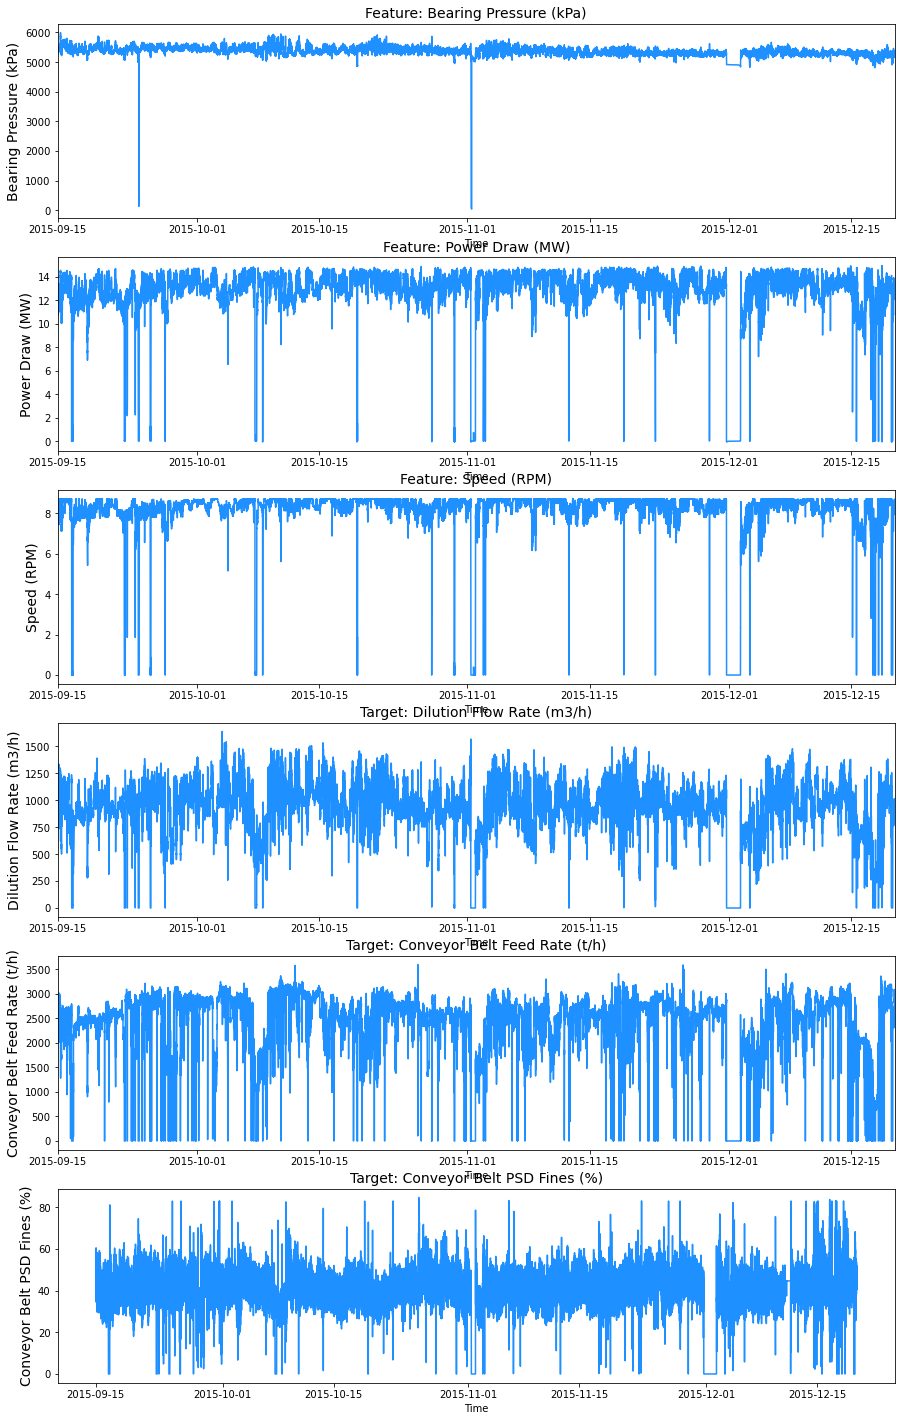

In [33]:
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 25))
sns.lineplot(x=df_cleaned.Time, y=df['Bearing Pressure (kPa)'].fillna(np.inf), ax=ax[0], color='dodgerblue')
ax[0].set_title('Feature: Bearing Pressure (kPa)', fontsize=14)
ax[0].set_ylabel(ylabel='Bearing Pressure (kPa)', fontsize=14)
sns.lineplot(x=df_cleaned.Time, y=df['Power Draw (MW)'].fillna(np.inf), ax=ax[1], color='dodgerblue')
ax[1].set_title('Feature: Power Draw (MW)', fontsize=14)
ax[1].set_ylabel(ylabel='Power Draw (MW)', fontsize=14)
sns.lineplot(x=df_cleaned.Time, y=df['Speed (RPM)'].fillna(np.inf), ax=ax[2], color='dodgerblue')
ax[2].set_title('Feature: Speed (RPM)', fontsize=14)
ax[2].set_ylabel(ylabel='Speed (RPM)', fontsize=14)
sns.lineplot(x=df_cleaned.Time, y=df['Dilution Flow Rate (m3/h)'].fillna(np.inf), ax=ax[3], color='dodgerblue')
ax[3].set_title('Target: Dilution Flow Rate (m3/h)', fontsize=14)
ax[3].set_ylabel(ylabel='Dilution Flow Rate (m3/h)', fontsize=14)
sns.lineplot(x=df_cleaned.Time, y=df['Conveyor Belt Feed Rate (t/h)'].fillna(np.inf), ax=ax[4], color='dodgerblue')
ax[4].set_title('Target: Conveyor Belt Feed Rate (t/h)', fontsize=14)
ax[4].set_ylabel(ylabel='Conveyor Belt Feed Rate (t/h)', fontsize=14)
sns.lineplot(x=df_cleaned.Time, y=df['Conveyor Belt PSD Fines (%)'].fillna(np.inf), ax=ax[5], color='dodgerblue')
ax[5].set_title('Target: Conveyor Belt PSD Fines (%)', fontsize=14)
ax[5].set_ylabel(ylabel='Conveyor Belt PSD Fines (%)', fontsize=14)

for i in range(5):
    ax[i].set_xlim([date(2015, 9, 15), date(2015, 12, 20)])   
plt.show()

## pandas box plots

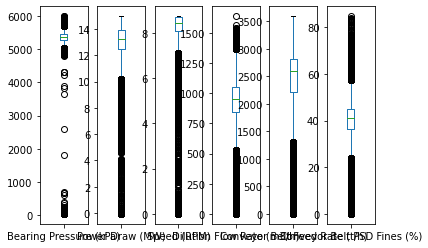

In [38]:
# Make a list of the column names to be plotted: cols
cols = ['Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)']

# Generate the box plots
df[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()